In [1]:
import numpy as np
import os

import random
import math


import matplotlib.pyplot as plt
import string
import astropy.units as u
import astropy.constants as const
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D

In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *


In [5]:
def get_colors(pcle):
    pcles = ['pp' ,'N13','O15' ,'F17', 'pep', 'Be7_861', 'Be7_384','nubb', 'Rn222', 'Kr85',
            'hep', 'dsnb','8B', 'atmNu_SURF_avg']
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'yellowgreen', 'turquoise', 'grey', 
              'coral','olive', 'teal', 'violet']
    line = '-'
    color_dict = dict(zip(pcles, colors))
    return color_dict.get(pcle), line

In [6]:
def get_official_pcle(pcle):
    if pcle == 'Be7_861':
        return r'$^{7}$Be 861keV'
    elif pcle == 'Be7_384':
        return r'$^{7}$Be 384keV'
    elif pcle == 'N13':
        return r'$^{13}$N'
    elif pcle == 'O15':
        return r'$^{15}$O'
    elif pcle == 'F17':
        return r'$^{17}$F'
    elif pcle == 'nubb':
        return r'2$\nu\beta\beta$'
    elif pcle == 'atmNu_SURF_avg':
        return 'Atm SURF'
    elif pcle == 'Kr85':
        return r'$^{85}$Kr'
    elif pcle == 'Rn222':
        return r'$^{222}$Rn'
    elif pcle == '8B':
        return r'$^{8}$B'
    elif pcle == 'dsnb':
        return 'DSNB'
    else:
        return pcle

# ER plot

ER
else
 ../real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/Be7_861_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/Be7_861_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/Be7_384_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/Be7_384_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/N13_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/N13_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/O15_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/O15_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/F17_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/F17_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/pep_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/pep_ER_Ebind_Xenon_pdf_low.txt
ER
ER
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
ER
 ../

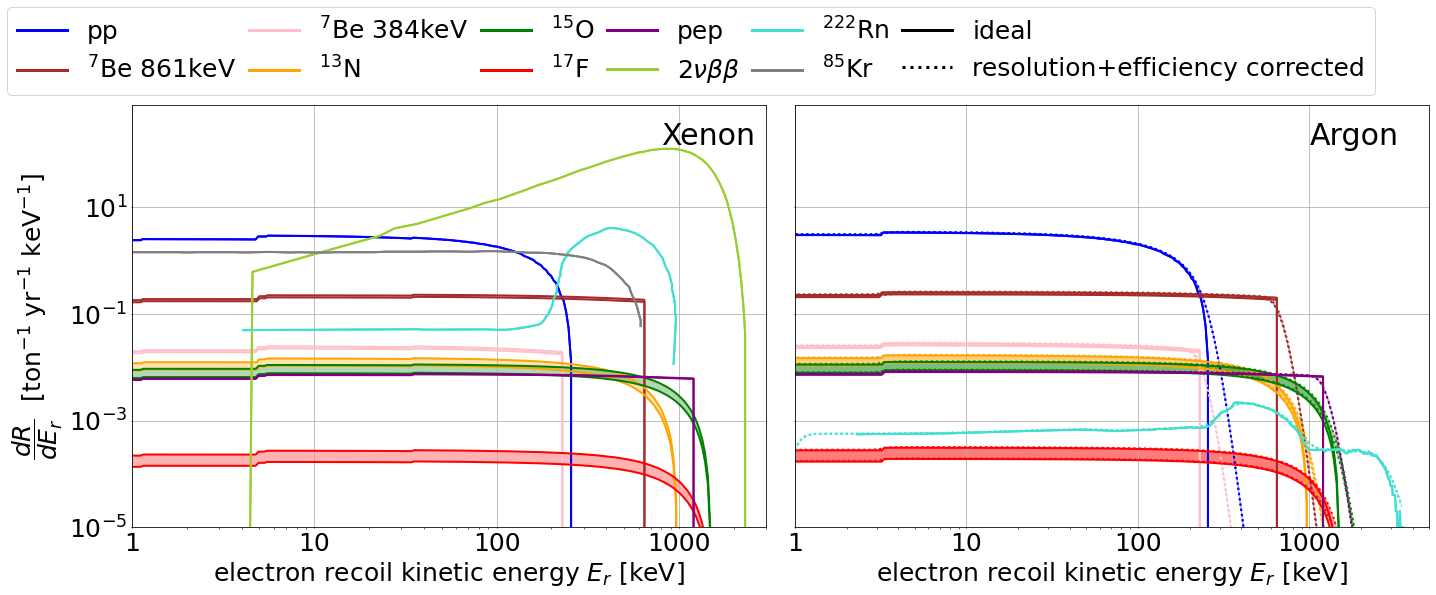

In [9]:
ER_Xe_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'nubb', 'Rn222', 'Kr85']
ER_Ar_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'Rn222']
metallicities = ['high', 'low']
pcles_groups = [ER_Xe_pcles, 
                ER_Ar_pcles
               ]
nucleons = ['Xenon', 'Argon']
fig, ax = plt.subplots(1,len(nucleons),figsize = (10*2, 7), sharey = True)

ax[0] = setup_cdfpdf_ax(ax[0], '',r'electron recoil kinetic energy $E_{r}$ '+ '[keV]', '', True, 'pdf', 25, 30, 
                vlines = [0], hlines = [0], xlims = [1, 3000], ylims = [1e-5, 800], log = [0,0])
ax[0].text(800, 400, 'Xenon', horizontalalignment='left', verticalalignment='top',fontsize = 30)



ax[1] = setup_cdfpdf_ax(ax[1], '',r'electron recoil kinetic energy $E_{r}$ '+ '[keV]', '', True, '', 25, 30,  
                 vlines = [], hlines = [0], xlims = [1, 5000], ylims = [1e-5, 800], log = [0,0])
ax[1].text(1000, 400, 'Argon', horizontalalignment='left', verticalalignment='top',fontsize = 30)


lines = ['-', ':']
custom_lines= [Line2D([0], [0], ls = get_colors(pcle)[1], lw=3, color = get_colors(pcle)[0]) for pcle in pcles_groups[0]]+[
    Line2D([0], [0], ls = l, lw=3, color = 'black') for l in lines]

custom_labels = [get_official_pcle(p) for p in pcles_groups[0]] + ['ideal', 'resolution+efficiency corrected']
for n, (nuclei, pcles_group) in enumerate(zip(nucleons, pcles_groups)):
    
    for k, pcle in enumerate(pcles_group): 
        
        recoil_type = get_recoil_type(pcle)

        if recoil_type == 'NR':
            if nuclei == 'Xenon':
                eff_types = ['']#, 'NR_Xe100_S1S2']
                corrs = ['']#, '_smear']
            elif nuclei == 'Argon':
                eff_types = ['', 'NR_Argon_tot']
                corrs = ['', '_smear0.1']
        elif recoil_type == 'ER':
            if nuclei == 'Xenon':
                eff_types = ['']#, 'ER_Xe100_S1']
                corrs = ['']#, '_smear']
            elif nuclei == 'Argon':
                eff_types = ['', '']
                corrs = ['', '_smear0.1']
        for eff, (eff_type, corr) in enumerate(zip(eff_types, corrs)):
            
            
            pdfs = []
            for metallicity in metallicities:
                
                Er_keV, pdf = read_pcle_pdf(pcle, nuclei, eff_type,metallicity_model = metallicity, 
                                            ebinding = True, plot = False, corr = corr)
                pdfs.append(pdf)
                ax[n].loglog(Er_keV, pdf, lw = 2, 
                                ls = lines[eff], color = get_colors(pcle)[0])

            ax[n].fill_between(Er_keV, pdfs[0], pdfs[1], color = get_colors(pcle)[0], alpha = 0.3)
            ax[n].tick_params(which='major', length=1)
        ax[n].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))

     
fig.tight_layout()
fig.legend(custom_lines,custom_labels,
           bbox_to_anchor=(0.005, 1, 0.95, .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=0., fontsize = 25)

In [10]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'pdf_smear_eff_ER_XeAr.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/pdf_smear_eff_ER_XeAr.pdf


# NR plot

NR
else
 ../real_data_nest/pdf/pp_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/pp_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/Be7_384_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/Be7_384_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/Be7_861_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/Be7_861_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/pep_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/pep_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/N13_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/N13_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/O15_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/O15_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/F17_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/F17_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_low.txt
NR
NR
NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
NR
else
 ../real_dat

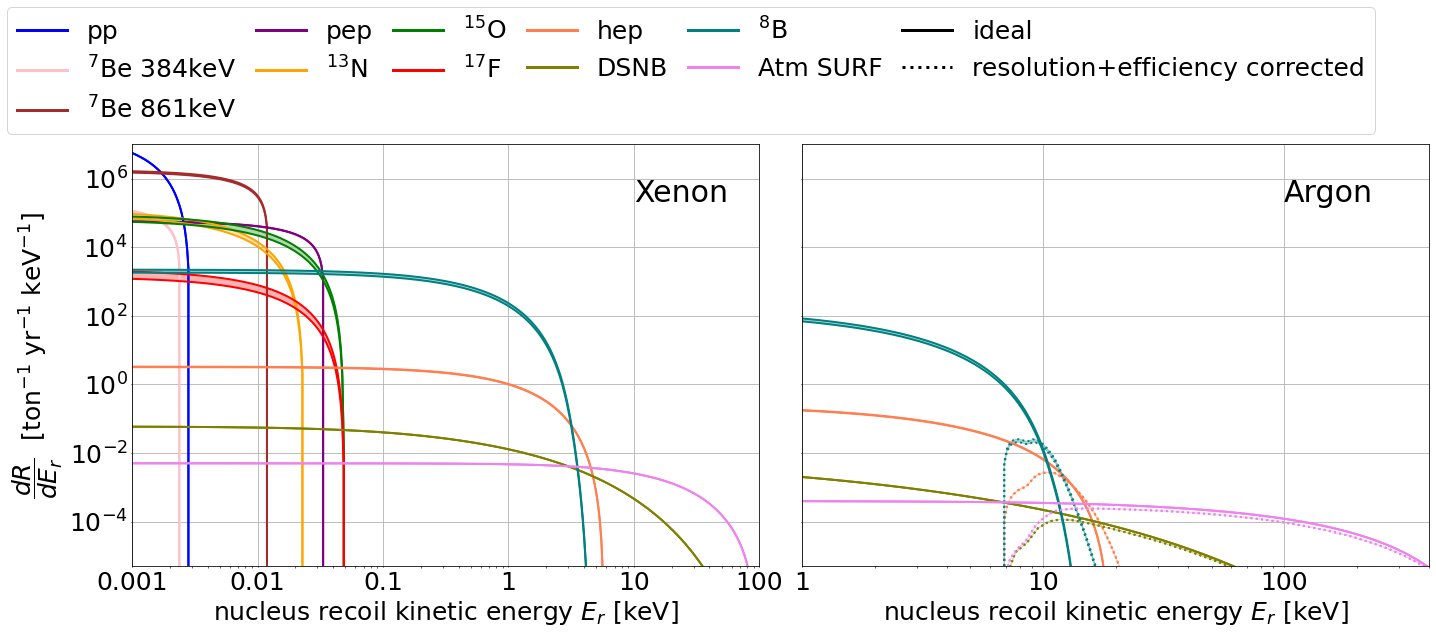

In [5]:

pcles_groups = [['pp' ,'Be7_384', 'Be7_861','pep',  'N13','O15' ,'F17', 'hep', 'dsnb','8B', 'atmNu_SURF_avg'],
                   ['pp','Be7_384', 'Be7_861','hep', 'dsnb','8B', 'atmNu_SURF_avg']
                   ]

metallicities = ['high', 'low']

nucleons = ['Xenon', 'Argon']
recoil_type = 'NR'
fig, ax = plt.subplots(1,len(nucleons),figsize = (10*2, 7), sharey = True)


ax[0] = setup_cdfpdf_ax(ax[0], '',r'nucleus recoil kinetic energy $E_{r}$ '+ '[keV]', '', True, 'pdf', 25, 30, 
                 vlines = [0], hlines = [0], xlims = [0.001, 100], ylims = [5e-6, 1e7], log = [0,0])        
ax[0].text(10, 1e6, 'Xenon', horizontalalignment='left', verticalalignment='top',fontsize = 30)


ax[1] = setup_cdfpdf_ax(ax[1], '',r'nucleus recoil kinetic energy $E_{r}$ '+ '[keV]', '', True, '', 25, 30, 
                 vlines = [], hlines = [0], xlims = [1, 400], ylims = [5e-6, 1e7], log = [0,0])    
ax[1].text(100, 1e6, 'Argon', horizontalalignment='left', verticalalignment='top',fontsize = 30)

lines = ['-', ':']
custom_lines= [Line2D([0], [0], ls = get_colors(pcle)[1], lw=3, color = get_colors(pcle)[0]) for pcle in pcles_groups[0]]+[
    Line2D([0], [0], ls = l, lw=3, color = 'black') for l in lines]

custom_labels = [get_official_pcle(p) for p in pcles_groups[0]] + ['ideal', 'resolution+efficiency corrected']
for n, (nuclei, pcles_group) in enumerate(zip(nucleons, pcles_groups)):
    
    for k, pcle in enumerate(pcles_group): 
           
        if recoil_type == 'NR':
            if nuclei == 'Xenon':
                eff_types = ['']#, 'NR_Xe100_S1S2']
                corrs = ['']#, '_smear']
            elif nuclei == 'Argon':
                eff_types = ['', 'NR_Argon_tot']#
                corrs = ['', '_smear0.1']#
   
        for eff, (eff_type, corr) in enumerate(zip(eff_types, corrs)):
            
            
            pdfs = []
            for metallicity in metallicities:
                
                Er_keV, pdf = read_pcle_pdf(pcle, nuclei, eff_type,recoil_type =recoil_type, metallicity_model = metallicity, 
                                            ebinding = True, plot = False, corr = corr)
                pdfs.append(pdf)
                ax[n].loglog(Er_keV, pdf, lw = 2, 
                                ls = lines[eff], color = get_colors(pcle)[0])

            ax[n].fill_between(Er_keV, pdfs[0], pdfs[1], color = get_colors(pcle)[0], alpha = 0.3)
            ax[n].tick_params(which='major', length=1)
        ax[n].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))

     
fig.tight_layout()
fig.legend(custom_lines,custom_labels,
           bbox_to_anchor=(0.005, 1, 0.95, .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=0., fontsize = 25)

In [6]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'pdf_smear_eff_NR_XeAr.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/pdf_smear_eff_NR_XeAr.pdf


# ERNR plot

ER
else
 ../real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/Be7_861_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/Be7_861_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/Be7_384_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/Be7_384_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/N13_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/N13_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/O15_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/O15_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/F17_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/F17_ER_Ebind_Xenon_pdf_low.txt
ER
else
 ../real_data_nest/pdf/pep_ER_Ebind_Xenon_pdf_high.txt
ER
else
 ../real_data_nest/pdf/pep_ER_Ebind_Xenon_pdf_low.txt
ER
ER
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
ER
 ../

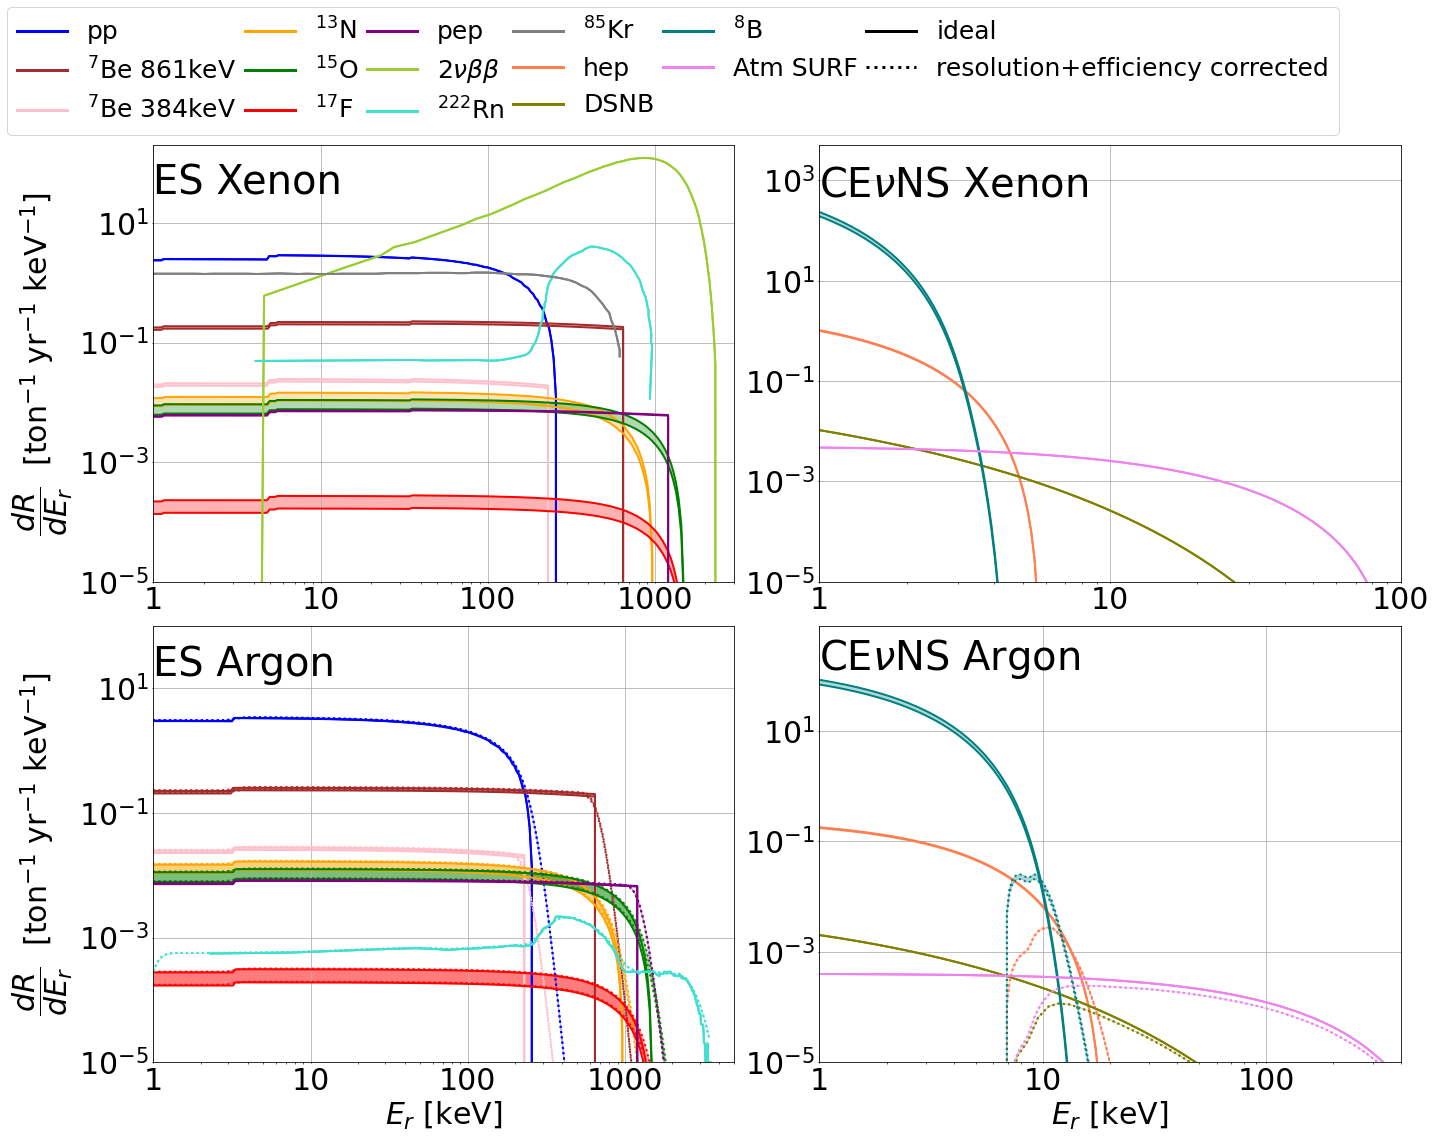

In [23]:
ER_Xe_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'nubb', 'Rn222', 'Kr85']
ER_Ar_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'Rn222']
NR_pcles = ['hep', 'dsnb','8B', 'atmNu_SURF_avg']

metallicities = ['high', 'low']
pcles_groups = [ER_Xe_pcles+NR_pcles, 
                ER_Ar_pcles+NR_pcles
               ]
nucleons = ['Xenon', 'Argon']
fig, ax = plt.subplots(2,len(nucleons),figsize = (10*2, 7*2))

ax[0][0] = setup_cdfpdf_ax(ax[0][0], '','', '', True, 'pdf', 30, 30, 
                    vlines = [0], hlines = [0], xlims = [1, 3000], ylims = [1e-5, 200], log = [0,0])
ax[0][0].text(1, 100, 'ES Xenon', horizontalalignment='left', verticalalignment='top',fontsize = 40)


ax[0][1] = setup_cdfpdf_ax(ax[0][1], '','', '', True, '', 30, 30, 
                    vlines = [0], hlines = [0], xlims = [1, 100], ylims = [1e-5, 5000], log = [0,0])        
ax[0][1].text(1, 2000, r'CE$\nu$NS Xenon', horizontalalignment='left', verticalalignment='top',fontsize = 40)


ax[1][0] = setup_cdfpdf_ax(ax[1][0], '',r'$E_{r}$ '+ '[keV]', '', True, 'pdf', 30, 30,  
                    vlines = [], hlines = [0], xlims = [1, 5000], ylims = [1e-5, 100], log = [0,0])
ax[1][0].text(1, 50, 'ES Argon', horizontalalignment='left', verticalalignment='top',fontsize = 40)

ax[1][1] = setup_cdfpdf_ax(ax[1][1], '',r'$E_{r}$ '+ '[keV]', '', True, '', 30, 30, 
                    vlines = [], hlines = [0], xlims = [1, 400], ylims = [1e-5, 800], log = [0,0])    
ax[1][1].text(1, 500, r'CE$\nu$NS Argon', horizontalalignment='left', verticalalignment='top',fontsize = 40)

lines = ['-', ':']
custom_lines= [Line2D([0], [0], ls = get_colors(pcle)[1], lw=3, color = get_colors(pcle)[0]) for pcle in pcles_groups[0]]+[
    Line2D([0], [0], ls = l, lw=3, color = 'black') for l in lines]

custom_labels = [get_official_pcle(p) for p in pcles_groups[0]] + ['ideal', 'resolution+efficiency corrected']
for n, (nuclei, pcles_group) in enumerate(zip(nucleons, pcles_groups)):
    
    for k, pcle in enumerate(pcles_group): 
        
        recoil_type = get_recoil_type(pcle)
        if recoil_type in ['NR']:
            p = 1
        if recoil_type in ['ER']:
            p = 0
            
        if recoil_type == 'NR':
            if nuclei == 'Xenon':
                eff_types = ['']#, 'NR_Xe100_S1S2']
                corrs = ['']#, '_smear']
            elif nuclei == 'Argon':
                eff_types = ['', 'NR_Argon_tot']
                corrs = ['', '_smear0.1']
        elif recoil_type == 'ER':
            if nuclei == 'Xenon':
                eff_types = ['']#, 'ER_Xe100_S1']
                corrs = ['']#, '_smear']
            elif nuclei == 'Argon':
                eff_types = ['', '']
                corrs = ['', '_smear0.1']
        for eff, (eff_type, corr) in enumerate(zip(eff_types, corrs)):
            
            
            pdfs = []
            for metallicity in metallicities:
                
                Er_keV, pdf = read_pcle_pdf(pcle, nuclei, eff_type,metallicity_model = metallicity, 
                                            ebinding = True, plot = False, corr = corr)
                pdfs.append(pdf)
                ax[n][p].loglog(Er_keV, pdf, lw = 2, 
                                ls = lines[eff], color = get_colors(pcle)[0])

            ax[n][p].fill_between(Er_keV, pdfs[0], pdfs[1], color = get_colors(pcle)[0], alpha = 0.3)
            ax[n][p].tick_params(which='major', length=1)
        ax[n][p].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5g'))

     
fig.tight_layout()
fig.legend(custom_lines,custom_labels,
           bbox_to_anchor=(0.005, 1, 0.925, .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=0., fontsize = 25)

In [24]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'pdf_smear_eff_ERNR_XeAr.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/pdf_smear_eff_ERNR_XeAr.pdf


survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
survival
phys685/nestfig/cdf_ERNR_XeAr_metal_low.pdf


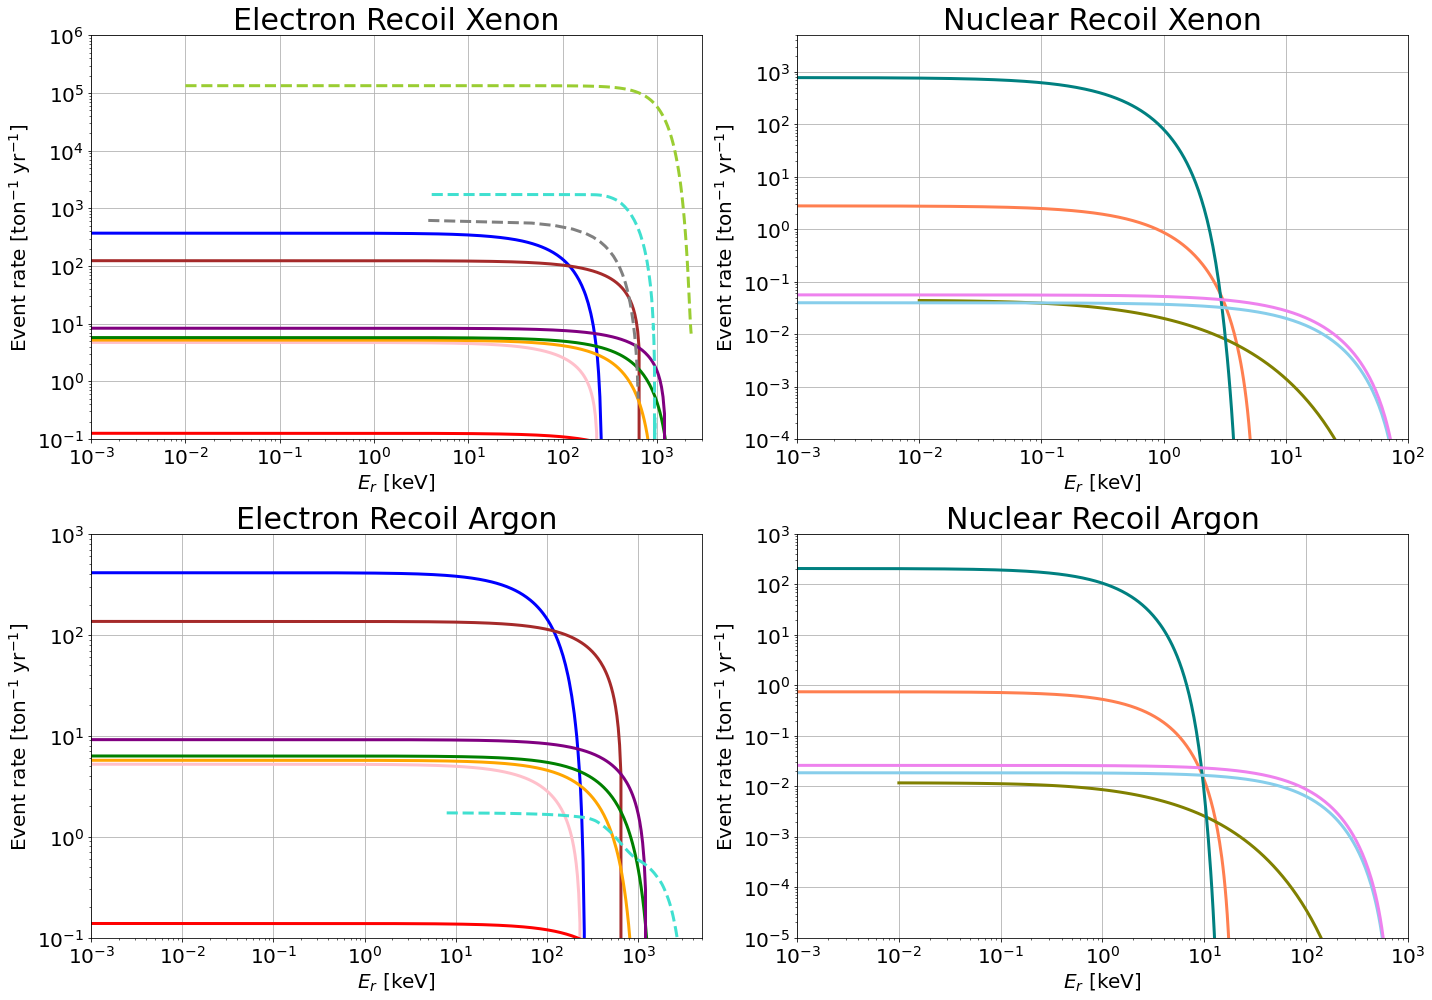

In [7]:
ER_Xe_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'nubb', 'Rn222', 'Kr85']
ER_Ar_pcles = ['pp' ,'Be7_861', 'Be7_384', 'N13','O15' ,'F17', 'pep', 'Rn222']
NR_pcles = ['hep', 'dsnb','8B', 'atmNu_Kamioka_FLUKA', 'atmNu_LNGS_FLUKA']

metallicity = 'low'
pcles_groups = [ER_Xe_pcles+NR_pcles, 
                ER_Ar_pcles+NR_pcles
               ]
nucleons = ['Xenon', 'Argon']
fig, ax = plt.subplots(2,len(nucleons),figsize = (10*2, 7*2))

ax[0][0] = setup_cdfpdf_ax(ax[0][0], 'Electron Recoil Xenon',r'$E_{r}$ '+ '[keV]', '', True, 'cdf', 20, 30, 
                    vlines = [0], hlines = [0], xlims = [1e-3, 3000], ylims = [1e-1, 1e6], log = [0,0])
    
ax[0][1] = setup_cdfpdf_ax(ax[0][1], 'Nuclear Recoil Xenon',r'$E_{r}$ '+ '[keV]', '', True, 'cdf', 20, 30, 
                    vlines = [0], hlines = [0], xlims = [1e-3, 100], ylims = [1e-4, 5000], log = [0,0])        

ax[1][0] = setup_cdfpdf_ax(ax[1][0], 'Electron Recoil Argon',r'$E_{r}$ '+ '[keV]', '', True, 'cdf', 20, 30, 
                    vlines = [0], hlines = [0], xlims = [1e-3, 5000], ylims = [1e-1, 1e3], log = [0,0])

ax[1][1] = setup_cdfpdf_ax(ax[1][1], 'Nuclear Recoil Argon',r'$E_{r}$ '+ '[keV]', '', True, 'cdf', 20, 30, 
                    vlines = [0], hlines = [0], xlims = [1e-3, 1000], ylims = [1e-5, 1000], log = [0,0])    


custom_lines= [Line2D([0], [0], ls = get_colors(pcle)[1], lw=3, color = get_colors(pcle)[0]) for pcle in pcles_groups[0]]
custom_labels = pcles_groups[0]
for n, (nuclei, pcles_group) in enumerate(zip(nucleons, pcles_groups)):
    
    for k, pcle in enumerate(pcles_group): 
        
        recoil_type = get_recoil_type(pcle)
        if recoil_type in ['NR']:
            p = 1
        if recoil_type in ['ER']:
            p = 0
        Er_keV, pdf = read_pcle_pdf(pcle, nuclei, '',metallicity_model = metallicity, ebinding = True, plot = False)

        cdf = get_cdf(pdf[:-1]/u.tonne/u.yr/u.keV, np.diff(Er_keV)*u.keV, 'survival')   
        if pcle in ['nubb', 'Rn222', 'Kr85']:
            
            ax[n][p].loglog(Er_keV[:-1], cdf, lw = 3, ls = get_colors(pcle)[1], color = get_colors(pcle)[0], label = pcle)
            
        else:
            ax[n][p].loglog(Er_keV[:-1], cdf, lw = 3, ls = get_colors(pcle)[1],color = get_colors(pcle)[0],  label = pcle)
            
      
fig.tight_layout()
'''
fig.legend(custom_lines,custom_labels,
           bbox_to_anchor=(0.1, 1, 0.8, .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0., fontsize = 20)

'''
save_path = os.path.join('phys685', 'nestfig')
save_name = os.path.join(save_path, 'cdf_ERNR_XeAr'+'_metal_'+metallicity+'.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
96.43838162336833 1 / (t yr)
NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
survival
79.3283461747131 1 / (t yr)
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_high_smear.txt
survival
240.9512055423719 1 / (t yr)
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_low_smear.txt
survival
198.20179810775005 1 / (t yr)
NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
Xe100_5_eff_eh_S1S2
survival
14.173110996767308 1 / (t yr)
NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
Xe100_5_eff_eh_S1S2
survival
11.658526787735386 1 / (t yr)
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_high_smear.txt
Xe100_5_eff_eh_S1S2
survival
40.11719414058889 1 / (t yr)
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_low_smear.txt
Xe100_5_eff_eh_S1S2
survival
32.99962743829275 1 / (t yr)
NR
using 8B pdf from experiment deteff_Xe1t
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_deteff_Xe1t.txt
deteff_Xe1t
survival
NR
us

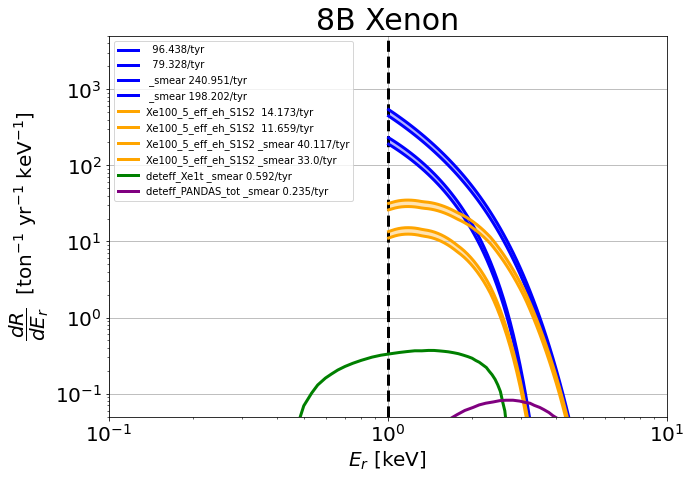

In [8]:
metallicities = ['high', 'low']
pcle = '8B'
nuclei = 'Xenon'
colors = ['blue', 'orange', 'green', 'purple']
fig, ax = plt.subplots(figsize = (10, 7))

lines = ['-', '--']
recoil_type = get_recoil_type(pcle)
eff_types = ['', 'Xe100_5_eff_eh_S1S2', 'deteff_Xe1t','deteff_PANDAS_tot']          

ax = setup_cdfpdf_ax(ax, '8B Xenon',r'$E_{r}$ '+ '[keV]', '', True, 'pdf', 20, 30, 
                    vlines = [1], hlines = [0], xlims = [0.1, 10], ylims = [5e-2, 5000], log = [0,0])        
 
corrs = ['', '_smear']
for eff, eff_type in enumerate(eff_types):
    if 'deteff' in eff_type:
        E_threshold_keV = 0
        exposure, Er_end, Er_keV, pdf, _, _ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, eff_type, recoil_type = '',
                      read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                        metallicity = metallicity, ebind = True, plot_pdf = False, corr = corr)
        ax.loglog(Er_keV, pdf, lw = 3, color = colors[eff], 
                      label = eff_type + ' '+corr+' '+str(round(exposure.value, 3))+'/tyr')
    else:
        E_threshold_keV = 1
        for corr in corrs:
            pdfs = []
            for metallicity in metallicities:

                exposure, Er_end, Er_keV, pdf, _, _ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, eff_type, recoil_type = '',
                          read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                            metallicity = metallicity, ebind = True, plot_pdf = False, corr = corr)

                print(exposure)
                ax.loglog(Er_keV, pdf, lw = 3, color = colors[eff], 
                          label = eff_type + ' '+corr+' '+str(round(exposure.value, 3))+'/tyr')
                pdfs.append(pdf)
            ax.fill_between(Er_keV, pdfs[0], pdfs[1], color = colors[eff], alpha = 0.3)

        
plt.legend()

NR
else
 ../real_data_nest/pdf/pp_NR_Xenon_pdf_high.txt
survival


(<Quantity 15529.74667593 1 / (t yr)>,
 0.0028092394828,
 array([1.00000000e-06, 1.02100465e-06, 1.04245049e-06, 1.06434680e-06,
        1.08670303e-06, 1.10952884e-06, 1.13283411e-06, 1.15662889e-06,
        1.18092347e-06, 1.20572835e-06, 1.23105425e-06, 1.25691211e-06,
        1.28331311e-06, 1.31026865e-06, 1.33779038e-06, 1.36589020e-06,
        1.39458024e-06, 1.42387291e-06, 1.45378086e-06, 1.48431702e-06,
        1.51549457e-06, 1.54732700e-06, 1.57982806e-06, 1.61301180e-06,
        1.64689254e-06, 1.68148494e-06, 1.71680394e-06, 1.75286480e-06,
        1.78968311e-06, 1.82727478e-06, 1.86565604e-06, 1.90484349e-06,
        1.94485406e-06, 1.98570503e-06, 2.02741407e-06, 2.06999919e-06,
        2.11347879e-06, 2.15787167e-06, 2.20319700e-06, 2.24947438e-06,
        2.29672380e-06, 2.34496568e-06, 2.39422086e-06, 2.44451062e-06,
        2.49585671e-06, 2.54828130e-06, 2.60180705e-06, 2.65645710e-06,
        2.71225504e-06, 2.76922501e-06, 2.82739160e-06, 2.88677997e-06,
       

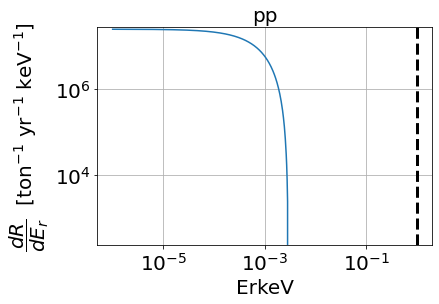

In [13]:
read_pcle_cdf('pp', 'Xenon', 0, '', recoil_type = 'NR',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = 'high', ebind = True, plot_pdf = True, corr = '')